# SD Simulations with Submission System


## Imports

In [1]:
import os
#for analysis
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import pygromos
from pygromos.files.gromos_system import Gromos_System
from pygromos.files.blocks import imd_blocks
from pygromos.data.simulation_parameters_templates import template_emin

## Input files

In [2]:
root_dir = project_dir = os.path.abspath(os.path.dirname(pygromos.__file__)+"/../examples/example_files/SD_Simulation")
root_in_dir = root_dir+"/SD_input"
cnf_path = root_in_dir+"/6J29_unitedatom_optimised_geometry.cnf"
top_path = root_in_dir + "/6J29.top"
sys_name = "6J29"

#External imd_changes:
grom_system = Gromos_System(in_cnf_path=cnf_path, in_top_path=top_path, in_imd_path=template_emin,
                            system_name=sys_name, work_folder=root_in_dir)



## RUN Emin

In [3]:
from pygromos.hpc_queuing.submission_systems.Submission_Systems import LOCAL as subSystem
from pygromos.simulation_runner.simulation_building_blocks import emin
step_name  = "a_vacuum_emin"

#Some special adaptation
grom_system.imd.BOUNDCOND.NTB =0
grom_system.imd.BOUNDCOND.NDFMIN = 0
grom_system.imd.WRITETRAJ = imd_blocks.WRITETRAJ()
grom_system.imd.WRITETRAJ.NTWX = 100
grom_system.imd.WRITETRAJ.NTWE = 100
del grom_system.imd.POSITIONRES
grom_system.adapt_imd()

In [4]:
grom_system.save(root_dir+"/test.obj", safe=False)

'test.obj'

In [5]:
grom_system = Gromos_System.load(root_dir+"/test.obj")

In [6]:
grom_system.solute_info._asdict()

OrderedDict([('names', ['6J29']),
             ('number', 1),
             ('positions', [1]),
             ('number_of_atoms', 27)])

In [7]:
emin_gromos_system, jobID = emin(in_gromos_system=grom_system, project_dir=project_dir,
                          step_name=step_name, submission_system=subSystem(), in_imd_path=None)
emin_gromos_system


################################################################################

a_vacuum_emin
################################################################################

Script:  /home/bschroed/Documents/code/pygromos/pygromos/hpc_queuing/job_scheduling/schedulers/simulation_scheduler.py
################################################################################
Simulation PREPERATION
################################################################################



################################################################################
Simulation Setup:
################################################################################

steps_per_run:  3000
equis:  0
simulation runs:  1

ChainSubmission - a_vacuum_emin


 submit  a_vacuum_emin_1
________________________________________

PREVIOUS ID:  None
SIMULATION ID:  0
CLEANING ID:  0
################################################################################

 submit Final AnaLysis part 

/home/bschroed/D

/home/bschroed/Documents/code/pygromos/pygromos/hpc_queuing/submission_systems/Submission_Systems.py:646: UserWarning: Queue search was called, but no queue present!
  warnings.warn("Queue search was called, but no queue present!")



GROMOS SYSTEM: a_vacuum_emin
################################################################################
WORKDIR: /home/bschroed/Documents/code/pygromos/examples/example_files/SD_Simulation/a_vacuum_emin/input
LAST CHECKPOINT: test.obj
FILES: 
	imd: /home/bschroed/Documents/code/pygromos/examples/example_files/SD_Simulation/a_vacuum_emin/input/a_vacuum_emin.imd
	top: /home/bschroed/Documents/code/pygromos/examples/example_files/SD_Simulation/a_vacuum_emin/input/a_vacuum_emin.top
	cnf: /home/bschroed/Documents/code/pygromos/examples/example_files/SD_Simulation/a_vacuum_emin/analysis/data/a_vacuum_emin.cnf
FUTURE PROMISE: True
SYSTEM: 
	Solute:	['6J29']  resID: [1]  natoms: 27
	SOLVENT:	[]  nmolecules: 0  natoms: 0



In [11]:
t = emin_gromos_system.solute_info
print(t)

solute_info(names=['6J29'], number=1, positions=[1], number_of_atoms=27)


In [8]:
emin_gromos_system


GROMOS SYSTEM: a_vacuum_emin
################################################################################
WORKDIR: /home/bschroed/Documents/code/pygromos/examples/example_files/SD_Simulation/a_vacuum_emin/input
LAST CHECKPOINT: test.obj
FILES: 
	imd: /home/bschroed/Documents/code/pygromos/examples/example_files/SD_Simulation/a_vacuum_emin/input/a_vacuum_emin.imd
	top: /home/bschroed/Documents/code/pygromos/examples/example_files/SD_Simulation/a_vacuum_emin/input/a_vacuum_emin.top
	cnf: /home/bschroed/Documents/code/pygromos/examples/example_files/SD_Simulation/a_vacuum_emin/analysis/data/a_vacuum_emin.cnf
FUTURE PROMISE: True
SYSTEM: 
	Solute:	['6J29']  resID: [1]  natoms: 27
	SOLVENT:	[]  nmolecules: 0  natoms: 0



## RUN SD Simulation

In [9]:
from pygromos.simulation_runner.simulation_building_blocks import sd

step_name  = "b_vacuum_sd"

sd_gromos_system, jobID  = sd(in_gromos_system=grom_system, project_dir=project_dir,
                              step_name=step_name, submission_system=subSystem(),
                      equilibration_runs=1, simulation_runs=3)
sd_gromos_system



ERROR! Session/line number was not unique in database. History logging moved to new session 1000
################################################################################

b_vacuum_sd
################################################################################

Script:  /home/bschroed/Documents/code/pygromos/pygromos/hpc_queuing/job_scheduling/schedulers/simulation_scheduler.py
################################################################################
Simulation PREPERATION
################################################################################



################################################################################
Simulation Setup:
################################################################################

steps_per_run:  3000
equis:  1
simulation runs:  3

ChainSubmission - eq_b_vacuum_sd


 submit  b_vacuum_sd_eq_1
________________________________________

PREVIOUS ID:  None
SIMULATION ID:  0
CLEANING ID:  0

ChainSubmission - b_vacuum_sd



GROMOS SYSTEM: b_vacuum_sd
################################################################################
WORKDIR: /home/bschroed/Documents/code/pygromos/examples/example_files/SD_Simulation/b_vacuum_sd/input
LAST CHECKPOINT: test.obj
FILES: 
	imd: /home/bschroed/Documents/code/pygromos/examples/example_files/SD_Simulation/b_vacuum_sd/input/b_vacuum_sd.imd
	top: /home/bschroed/Documents/code/pygromos/examples/example_files/SD_Simulation/b_vacuum_sd/input/b_vacuum_sd.top
	cnf: /home/bschroed/Documents/code/pygromos/examples/example_files/SD_Simulation/b_vacuum_sd/analysis/data/b_vacuum_sd.cnf
FUTURE PROMISE: True
SYSTEM: 
	Solute:	['6J29']  resID: [1]  natoms: 27
	SOLVENT:	[]  nmolecules: 0  natoms: 0



## Further Analysis:
Transform the trc into a pdb traj to check it out with pymol :!)

In [12]:
#final analysis dir:
from pygromos.utils import bash

out_ana = project_dir+"/c_ana"
if(not os.path.exists(out_ana)):
    bash.make_folder(out_ana)

In [13]:
from pygromos.files.trajectory.trc import Trc

in_path=project_dir+"/b_vacuum_sd/analysis/data/b_vacuum_sd.trc.h5"

trc = Trc(input_value=in_path)
trc.write_pdb(out_ana+"/sd_traj.pdb", cnf_file=cnf_path)#grom_system.cnf.path)
trc

Trajectory: 
	Read from hdf save 
	Contains only database
	
Type: 
	Trc
Frames: 	61	 Columns:	29


In [14]:
from pygromos.files.trajectory.tre import Tre
in_path=project_dir+"/b_vacuum_sd/analysis/data/b_vacuum_sd.tre.h5"

tre = Tre(input_value=in_path)
tre



Trajectory: 
	Read from hdf save 
	Contains only database
	
Type: 
	Tre
Frames: 	61	 Columns:	15


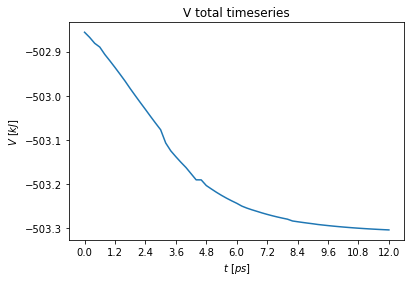

In [15]:
#Plot Potential Energies
V_tot = np.array(list(map(lambda x: x[2], tre.database.totals)))
step = len(tre.database.TIMESTEP_time)//10

plt.plot(tre.database.TIMESTEP_time, V_tot)
plt.xticks(np.round(list(tre.database.TIMESTEP_time[::step]),2))
plt.xlabel("$t~[ps]$")
plt.ylabel("$V~[kJ]$")
plt.title("V total timeseries")
plt.savefig(out_ana+"/potential_energy_timeseries.png")